In [21]:
#EXO4 de Fichier TP2
#applique l'ACP sur la matrice

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

matrice = np.array([[2, 3],
                    [4, 5],
                    [6, 1]])
a = np.array([[8, 1, 0],
                    [4, 6, 5],
                    [6, 8, 7],
                    [10, 4, 7],
                    [8, 2, 5],
                    [0, 3, 6]])
df = pd.DataFrame(data=matrice)
print("\nNotre Tableau de données (Sachant que les données sont hétérogènes)\n")
display(df)


Notre Tableau de données (Sachant que les données sont hétérogènes)



,0,1
0,2,3
1,4,5
2,6,1


In [22]:
print("\nEtape 1: Centrer le tableau: X = X - g avec g = moyenne\n")
df1 = pd.DataFrame()
for i in df:
    df1[i] = df[i] - df[i].mean()
display(df1)


Etape 1: Centrer le tableau: X = X - g avec g = moyenne



,0,1
0,-2.0,0.0
1,0.0,2.0
2,2.0,-2.0


In [23]:
print("\nEtape 2: Calculer la matrice variance covariance: V = 1 / N * Xt * X\n")
df_t = df1.transpose()
vaco = np.dot(df1.transpose(), df1)
V = (1 / df.shape[0]) * vaco
display(V)


Etape 2: Calculer la matrice variance covariance: V = 1 / N * Xt * X



array([[ 2.66666667, -1.33333333],
       [-1.33333333,  2.66666667]])

In [24]:
print("\nEtape 3: Déterminer la métrique M:\n")
print("Pour les données homogéne:")
m_ho = np.zeros((df.shape[1], df.shape[1]), float)
np.fill_diagonal(m_ho, 1)
I = pd.DataFrame(data=m_ho)
display(I)
print("\nPour les données hétérogènes:")
m_he = np.zeros((df.shape[1], df.shape[1]), float)
np.fill_diagonal(m_he, 1 / V[0][0])
M = pd.DataFrame(data=m_he)
display(M)


Etape 3: Déterminer la métrique M:

Pour les données homogéne:


,0,1
0,1.0,0.0
1,0.0,1.0



Pour les données hétérogènes:


,0,1
0,0.375,0.000
1,0.000,0.375


In [25]:
print("\nEtape 4: Recherche des axes principaux Uk de la matrice (VM)\n")
print("\t=> Calculer les valeurs propres Dét(VM - ΛI) = 0")
#x1 = - vaco[0][1] / df.shape[0] #pour 4-3x0
#x2 = (vaco[0][0] - vaco[0][1]) / df.shape[0] #pour 8 - 3x + 4
#c = 0
#print(vaco, "- x\n", I)
det = np.linalg.eig(V)
print(det)
print("\n\t=> Trier Les valeurs propres par ordre décroissant: lambda1 > lamba2..")
l = []

newl = sorted(l)

for i in det[0]:
    l.append(i)
print("\nOn a:", sorted(l), "Alors: lambda1 =", max(l), "et lambda2 =", min(l))


Etape 4: Recherche des axes principaux Uk de la matrice (VM)

	=> Calculer les valeurs propres Dét(VM - ΛI) = 0
(array([4.        , 1.33333333]), array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]]))

	=> Trier Les valeurs propres par ordre décroissant: lambda1 > lamba2..
[4.0, 1.3333333333333333]

On a: [1.3333333333333333, 4.0] Alors: lambda1 = 4.0 et lambda2 = 1.3333333333333333


In [26]:
print("\nEtape 5: Calculer la qualité de représentation: Q\n")
q = 0.0
i = len(l) - 1
while q < 0.8:
    if i == 0 :
        q = (sum(l)) / sum(l)
        print("La Qualité =", q)
        print("Les axes principaux sont:", l)
    else: 
        q = (sum(l) - l[i])/ sum(l)
    i -= 1


Etape 5: Calculer la qualité de représentation: Q

La Qualité = 1.0
Les axes principaux sont: [4.0, 1.3333333333333333]


In [27]:
print("\nEtape 6: Calculer les vacteurs propres Uk: V*M*U = lambda*U \n")
u = [[det[1][0][0], det[1][0][1]], [det[1][1][0], det[1][1][1]]]
print("Pour lambda1 =", max(l), "V * M* U1 = Lambda1 * U1:\n")
U1 = np.array(u[1])
print(U1)
print("\nPour lambda2 =", min(l), "V * M* U2 = Lambda2 * U2:\n")
U2 = np.array(u[0])
print(U2)


Etape 6: Calculer les vacteurs propres Uk: V*M*U = lambda*U 

Pour lambda1 = 4.0 V * M* U1 = Lambda1 * U1:

[-0.70710678  0.70710678]

Pour lambda2 = 1.3333333333333333 V * M* U2 = Lambda2 * U2:

[0.70710678 0.70710678]


In [28]:
print("\nEtape 7: Calculer les composantes principales: C = <Xi, Uk> = X.T * M * Uk et Ck = X * M * U\n")
C1 = np.dot(df1, U1)
print("Pour C1:\n")
print(C1)
C2 = np.dot(df1, U2)
print("\nPour C2:\n")
print(C2)
C = pd.DataFrame()
C["U1"] = C1
C["U2"] = C2
print("\nOn a C = ")
print(C)


Etape 7: Calculer les composantes principales: C = <Xi, Uk> = X.T * M * Uk et Ck = X * M * U

Pour C1:

[ 1.41421356  1.41421356 -2.82842712]

Pour C2:

[-1.41421356  1.41421356  0.        ]

On a C = 
         U1        U2
0  1.414214 -1.414214
1  1.414214  1.414214
2 -2.828427  0.000000



Etape 8: Represésenter graphiquement les individus dans l'espace réduit:



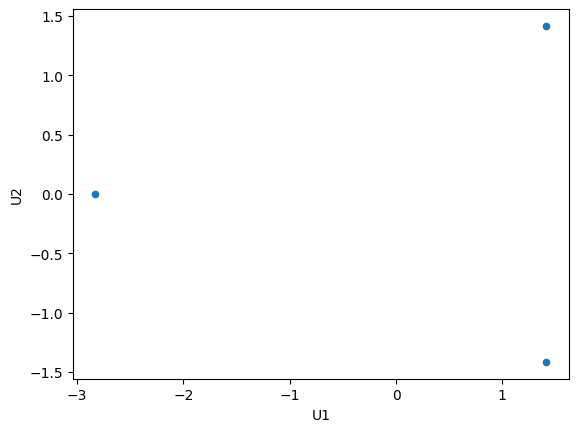

In [29]:
print("\nEtape 8: Represésenter graphiquement les individus dans l'espace réduit:\n")
#plt.plot(C["U1"], C["U2"])
C.plot(x='U1', y='U2', kind='scatter')	
plt.show()

In [30]:
print("\nEtape 9: Les contributions aux inerties :\n")
print("\t => Part d’inertie de 𝑋𝑖 prise en compte par l’axe 𝑈𝑘:")
print("\t => Contribution relative de l’individu 𝑋𝑖 à l’inertie expliquée de l’axe 𝑈𝑘:")


Etape 9: Les contributions aux inerties :

	 => Part d’inertie de 𝑋𝑖 prise en compte par l’axe 𝑈𝑘:
	 => Contribution relative de l’individu 𝑋𝑖 à l’inertie expliquée de l’axe 𝑈𝑘:
